## Compare CO$_2$ HITRAN and HITEMP

⚠️ *HITEMP CO2 computations require a lot of RAM. If you're lucky to be hosted on a  https://notebooks.gesis.org binder with 8 GB RAM you should be fine. If on the others https://mybinder.org/ Binder providers with 2 GB RAM you may be at risk of crashing your Binder.* 

Compare the asymmetric stretching band  of CO2 (the 2400 cm-1 / 4.2 µm band), at various temperatures from 300 to 3500 K, in the HITRAN and HITEMP databases. If using these databases in your work, remember [to cite them](https://radis.readthedocs.io/en/latest/references/references.html#line-databases).

For any help, refer to [RADIS documentation](https://radis.readthedocs.io) 

---

First let's initialize our RADIS environment, and the calculation conditions : 

## Databases 

The HITRAN database will be automatically downloaded. The HITEMP database files for CO2 have been preconfigured in the RADIS [~/radis.json](../radis.json) config file. You can see the list of preconfigured databases with [printDatabankList()](https://radis.readthedocs.io/en/latest/gen_modules/radis.misc.config.html#radis.misc.config.printDatabankList). 


### Calculations

Let's initialize the plot environment, and choose some conditions for all the calculations : 

In [4]:
# Setup plots : use `%matplotlib widget` for interactive plots (zoom, etc.) but graphs will not appear on download.
%matplotlib inline

from astropy import units as u
conditions = {"wavenum_min": 2000 / u.cm, 
              "wavenum_max": 2400 / u.cm,
              "molecule":'CO2',
              "isotope":'1,2,3',
              "pressure":1.01325 * u.bar,
              "mole_fraction":1,
              "path_length":1 * u.cm,
             }


Now let's calculate the spectra with [calc_spectrum()](https://radis.readthedocs.io/en/latest/source/radis.lbl.calc.html#radis.lbl.calc.calc_spectrum) 

In [5]:
from radis import calc_spectrum
# CO2 HITRAN
s_tran = calc_spectrum(**conditions,
                       Tgas=300, 
                       databank='fetch',  # HITRAN automatically downloaded
                       name="HITRAN"
                      )
# without verbose=False this will show all the input parameters. 
# With verbose=2,3,etc... we get increasing number of details about the calculation. 

Using cache file: /home/jovyan/.astropy/cache/astroquery/Hitran/tempfile_CO2_1_2000.00_2400.00.h5
Using cache file: /home/jovyan/.astropy/cache/astroquery/Hitran/tempfile_CO2_2_2000.00_2400.00.h5
Using cache file: /home/jovyan/.astropy/cache/astroquery/Hitran/tempfile_CO2_3_2000.00_2400.00.h5
HAPI version: 1.1.2.0
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2017 are now available in HAPI code

           It is free to use HAPI. If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005
Calculating Equilibrium Spectrum
Physical Conditio

Now let's compute with HITEMP. 

⚠️ *The first computation may take a lot of time to generate .hdf5 [cache files](https://radis.readthedocs.io/en/latest/source/radis.misc.cache_files.html) from the HITEMP files. At this point this is not yet done while setting up the databases. The spectrum calculation itself will be extremelly fast for the rest of your session !*

In [6]:
# CO2 HITEMP
s_temp = calc_spectrum(**conditions,
                       Tgas=300, 
                       databank='hitemp',  # HITEMP automatically downloaded
                       name="HITEMP2019",
                       verbose=3,          # adding some extra info for the first computation
                      )

LDM algorithm used. Defaulting broadening method from <radis.misc.utils.Default object at 0x7f018eb57700> to Voigt
... removed downloaded cache files for /home/jovyan/.radisdb/hitemp/downloads(can_be_deleted)
Generated dataframe from /home/jovyan/.radisdb/hitemp/CO2-02_02000-02125_HITEMP2010.h5 in 4.87s (541749 rows, 30 columns, 309.88 MB)
Generated dataframe from /home/jovyan/.radisdb/hitemp/CO2-02_02125-02250_HITEMP2010.h5 in 8.74s (922286 rows, 30 columns, 527.55 MB)
Generated dataframe from /home/jovyan/.radisdb/hitemp/CO2-02_02250-02500_HITEMP2010.h5 in 3.41s (349005 rows, 30 columns, 199.63 MB)
The following columns had the `object` format and were removed: ['ierr', 'iref', 'lmix', 'Fu', 'syml', 'Fl']
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1,2,3
   

/srv/conda/envs/notebook/lib/python3.8/site-packages/radis/misc/warning.py:350: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))


Plot the difference with [plot_diff](https://radis.readthedocs.io/en/latest/source/radis.spectrum.compare.html#radis.spectrum.compare.plot_diff)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Avant Garde, sans-serif


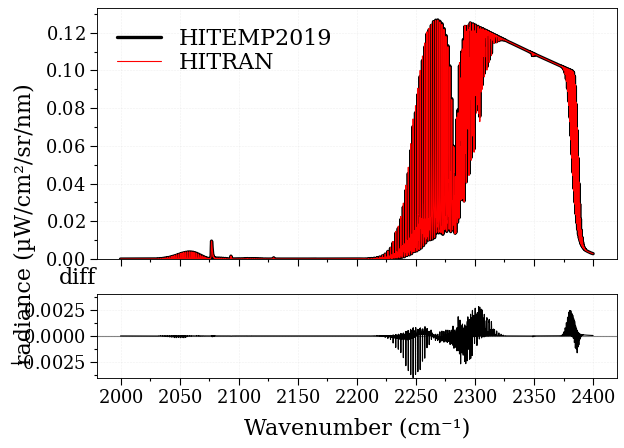

(<Figure size 640x480 with 2 Axes>,
 [<AxesSubplot:>, <AxesSubplot:xlabel='Wavenumber (cm⁻¹)'>])

In [7]:
from radis import plot_diff
plot_diff(s_temp, s_tran, Iunit='µW/cm2/sr/nm')

### Comparison for various temperatures 

Let's make a loop.

In the first case above, we saw that loading the database took most of the calculation time. We'll use [SpectrumFactory](https://radis.readthedocs.io/en/latest/gen_modules/radis.html#radis.SpectrumFactory) to load the database once, and compute a batch of different spectra.  

In [ ]:
from radis import SpectrumFactory

conditions.update({
    "warnings":{
            "MissingSelfBroadeningWarning": "ignore", # HITRAN has no temperature dependance for resonant-broadening
            "HighTemperatureWarning": "ignore", # HITRAN at high temperature is not valid and will trigger warnings. 
            "AccuracyWarning":"ignore",   # raised for too coarse grid (extremelly coarsed grid will still raise an error)
        },
    "verbose": False,  # no need to print calculation details 
})
    
sf_trans = SpectrumFactory(**conditions)
sf_temp = SpectrumFactory(**conditions)
sf_trans.fetch_databank("hitran")
sf_temp.fetch_databank("hitemp")

for Tgas in [300, 700, 1300, 2000, 2500, 3000, 3500]:
    s_tran =  sf_trans.eq_spectrum(Tgas=Tgas, name="HITRAN")
    s_temp = sf_temp.eq_spectrum(Tgas=Tgas, name="HITEMP2019")
    plot_diff(s_temp, s_tran, 'abscoeff', title=f"{Tgas}K")